# WeRateDogs Data Wrangling & Visualization

## Introduction

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 8 million followers and has received international media coverage.

## Table of Contents
- [1. GATHERING THE DATA](#GATHERING-THE-DATA)
	- [1.1. Twitter Archive Data](#TwitterArchiveData)
	- [1.2. Image Predictions Data](#ImagePredictionsData)
	- [1.3. API Data](#APIdata)
- [2.ASSESSING THE DATA](#AssessingTheData)
	- [2.1. Overall View](#OverallView)
	- [2.2. Checking the Null, None and Missing Data](#CheckingMissingData)
	- [2.3. Checking the Duplicate Data](#CheckingDuplicateData)
	- [2.4. Quick Look The Dataset](#QuickLookTheDataset)
	- [2.5. Crucial Criteria](#CrucialCriteria)
	- [2.6. Findings](#Findings)
		- [2.6.1. Quality](#Quality)
		- [2.6.2. Tidiness](#Tidiness)
- [3. CLEANING THE DATA](#CLEANING-THE-DATA)
	- [3.1. Missing Data](#Missing-Data)
		- [3.1.1. Missing Counts for doggo, floofer and puppo Columns in archive_table dataset](#Missing-Counts-for-doggo)
		- [3.1.2. Missing names are identified in the text and name columns in archive table](#Missing-names)
	- [3.2. Tidy Data](#Tidy-Data)
		- [3.2.1. Multiple columns containing the same type of data in the archive table](#Multiple-columns-arch)
		- [3.2.2. Multiple columns containing the same type of data in the predictions table](#Multiple-columns-pred)
		- [3.2.3. Tweet data in the api_data table should be merged](#data-in-the-api-data)
	- [3.3. Data Quality](#Data-Quality)
		- [3.3.1.Some posts don't have images, we should remove those tweets](#dont_have_images)
		- [3.3.2. Replies and retweets are included in archive table](#RepliesRetweetsIncluded)
		- [3.3.3. Text column in archive includes both text and short link](#text_and_short_link)
		- [3.3.4. Values for rating_numerator are incorrect](#Rating_numeratorIncorrect)
		- [3.3.5. Values for rating_denominator are incorrect](#Rating_denominatorIncorrect)
		- [3.3.6. Erroneous datatypes](#ErroneousDatatypes)
	- [3.4. Save the Cleaned Datas](#SaveCleanedDatas)
- [4. ANALYSIS & VISULIZATIONS](#ANALYSIS-VISULIZATIONS)
	- [4.1. Retweet Counts](#RetweetCounts)
	- [4.2. Favorites Count](#FavoritesCount)
	- [4.3. Most Popular Names](#MostPopNames)
	- [4.4. What is the Most Common Rating?](#CommonRating)
    - [4.5. Interactions Over Time](#IntOverTime)
		- [4.5.1. Retweets](#Retweets)
		- [4.5.2. Favorites](#Favorites)
		- [4.5.3. Followers](#Followers)
	- [4.6. Popular Dog Types](#PopDogTypes)
		- [4.6.1. Overall Popular](#OverallPop)
		- [4.6.2. Dog Types vs Retweet & Favorites](#DogTypeRTFav)
	- [4.7. Highest Rated Dogs of All Time](#HighestRatedDogs)
		- [4.7.1. Top 5 Retweet Dogs](#Top5RT)
		- [4.7.2. Top 5 Favorited Dogs](#Top5Fav)
	- [4.8. Is There a Correlation Between Retweets and Favorites?](#Correlation)
    - [4.9. How Good Twitter Prediction Algorithm is?](#HowGoodTwitter)

### Loading the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import json
import os
import time
import re
import warnings
import requests
import string
import tweepy
from io import BytesIO
from PIL import Image
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib inline

# 1. GATHERING THE DATA  <a class="anchor" id="chapter1"></a>

We will obtain data from three different sources: 
    - Manually downloaded "Twitter_Archive_Enhanced.csv" file
    - Programmatically downloaded "image-predictions.tsv" file
    - Scraped data using Twitter API.

## 1.1. Twitter Archive Data <a class="anchor" id="TwitterArchiveData"></a>

In [47]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.shape

(2356, 17)

## 1.2. Image Predictions Data <a class="anchor" id="ImagePredictionsData"></a>

Make directory if it doesn't exist

In [117]:
# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

Get the data from the URL

In [118]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [119]:
# Create File
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [120]:
ls

image_predictions/  twitter-archive-enhanced.csv
tweet_json.txt      wrangle_act.ipynb


In [4]:
image_predictions = pd.read_csv("image_predictions/image-predictions.tsv", sep='\t')

## 1.3. API Data <a class="anchor" id="APIdata"></a>

In [122]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [123]:
tweet = api.get_status(twitter_archive.tweet_id[2000], tweet_mode='extended')

In [124]:
info = tweet._json
info

{'created_at': 'Thu Dec 03 18:52:12 +0000 2015',
 'id': 672488522314567680,
 'id_str': '672488522314567680',
 'full_text': 'This is Jackie. She was all ready to go out, but her friends just cancelled on her. 10/10 hang in there Jackie https://t.co/rVfi6CCidK',
 'truncated': False,
 'display_text_range': [0, 134],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 672488519928037376,
    'id_str': '672488519928037376',
    'indices': [111, 134],
    'media_url': 'http://pbs.twimg.com/media/CVUovvHWwAAD-nu.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CVUovvHWwAAD-nu.jpg',
    'url': 'https://t.co/rVfi6CCidK',
    'display_url': 'pic.twitter.com/rVfi6CCidK',
    'expanded_url': 'https://twitter.com/dog_rates/status/672488522314567680/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'large': {'w': 304, 'h': 411, 'resize': 'fit'},
     'small': {'w': 304, 'h': 411, 'resize': 'f

In [125]:
info['retweet_count']

404

In [126]:
info['favorite_count']

1046

In [127]:
info['user']['followers_count']

8868775

In [128]:
print(datetime.datetime.now().time())

21:54:53.733919


In [129]:
# Making the file, If it does not exist already 
file_name = 'tweet_json.txt'
if not os.path.isfile(file_name):
    open(file_name, 'w', encoding = 'UTF-8').close()

In [130]:
tweet_ids = twitter_archive.tweet_id

In [131]:
tweet_errors = {}
tweet_count = 1
data = []
for tweet_id in tweet_ids:
    try:
        # Print id counter
        print(tweet_count)
        # Collect tweet info
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        info = tweet._json
        #print(info) # debug test
        #break # debug test
        # Append to file
        data.append(info)
        with open(file_name, 'w') as file:
            json.dump(data, file)
        # Print timer info to estimate time until wake-up
        print(datetime.datetime.now().time())
        # Add one to the tweet count for further printing
        tweet_count += 1
        
    except Exception as e:
        # Print exception info and add to tweet_errors dict
        print(str(tweet_id) + ": " + str(e))
        tweet_errors[str(tweet_count - 1) + "_" + str(tweet_id)] = info


1
21:54:54.023520
2
21:54:54.193968
3
21:54:54.416854
4
21:54:54.587924
5
21:54:54.775109
6
21:54:55.001339
7
21:54:55.182006
8
21:54:55.409976
9
21:54:55.588262
10
21:54:55.801703
11
21:54:55.979279
12
21:54:56.149420
13
21:54:56.349630
14
21:54:56.582907
15
21:54:56.818077
16
21:54:57.025293
17
21:54:57.243161
18
21:54:57.469057
19
21:54:57.661157
20
888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
20
21:54:57.986774
21
21:54:58.189588
22
21:54:58.367267
23
21:54:58.614214
24
21:54:58.835517
25
21:54:59.046457
26
21:54:59.228014
27
21:54:59.439448
28
21:54:59.629236
29
21:54:59.814062
30
21:54:59.996547
31
21:55:00.236478
32
21:55:00.462697
33
21:55:00.679562
34
21:55:00.861949
35
21:55:01.060708
36
21:55:01.259129
37
21:55:01.477196
38
21:55:01.692716
39
21:55:01.880070
40
21:55:02.072532
41
21:55:02.269128
42
21:55:02.521051
43
21:55:02.807646
44
21:55:03.005325
45
21:55:03.257181
46
21:55:03.504752
47
21:55:03.747426
48
21:55:03.994944
49
21:55:04.22

In [132]:
data = {}
data['tweets'] = []
tweet_errors = {}
tweet_count = 1
for tweet_id in tweet_ids:
    try:
        # Print id counter
        print(tweet_count)
        # Collect tweet info
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        info = tweet._json
        # Collect specific data
        retweet_count = info['retweet_count']
        favorite_count = info['favorite_count']
        followers_count = info['user']['followers_count']
        # Append to data dict
        data['tweets'].append({
            'tweet_id': tweet_id, 
            'retweet_count': retweet_count, 
            'favorite_count': favorite_count,
            'followers_count': followers_count})
        
        #print(retweet_count, favorite_count, followers_count) # debug test
        #print(data)
        #break # debug test
        
        # Print timer info to estimate time until wake-up
        print(datetime.datetime.now().time())
        # Add one to the tweet count for further printing
        tweet_count += 1
        
    except Exception as e:
        # Print exception info and add to tweet_errors dict
        print(str(tweet_count) + "_" + str(tweet_id) + ": " + str(e))
        tweet_errors[str(tweet_count) + "_" + str(tweet_id)] = info

1
22:35:36.177949
2
22:35:36.345126
3
22:35:36.515509
4
22:35:36.715887
5
22:35:36.954056
6
22:35:37.148162
7
22:35:37.370032
8
22:35:37.563622
9
22:35:37.732082
10
22:35:37.959605
11
22:35:38.152473
12
22:35:38.323349
13
22:35:38.504983
14
22:35:38.730624
15
22:35:38.899961
16
22:35:39.072020
17
22:35:39.283234
18
22:35:39.448768
19
22:35:39.675586
20
20_888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
20
22:35:39.989367
21
22:35:40.183826
22
22:35:40.377661
23
22:35:40.542971
24
22:35:40.803544
25
22:35:40.969147
26
22:35:41.172482
27
22:35:41.338110
28
22:35:41.579743
29
22:35:41.787368
30
22:35:41.954444
31
22:35:42.152121
32
22:35:42.345114
33
22:35:42.523570
34
22:35:42.699122
35
22:35:42.891127
36
22:35:43.086988
37
22:35:43.282924
38
22:35:43.449694
39
22:35:43.650661
40
22:35:43.820260
41
22:35:43.997460
42
22:35:44.279131
43
22:35:44.444805
44
22:35:44.644072
45
22:35:44.867414
46
22:35:45.093706
47
22:35:45.287424
48
22:35:45.451158
49
22:35:45

In [134]:
tweet_errors.keys()

dict_keys(['20_888202515573088257', '95_873697596434513921', '100_872668790621863937', '102_872261713294495745', '115_869988702071779329', '128_866816280283807744', '150_861769973181624320', '176_856602993587888130', '204_851953902622658560', '239_845459076796616705', '244_844704788403113984', '250_842892208864923648', '285_837366284874571778', '286_837012587749474308', '350_829374341691346946', '368_827228250799742977', '491_812747805718642688', '550_802247111496568832', '733_779123168116150273', '766_775096608509886464', '796_771004394259247104', '798_770743923962707968', '869_759566828574212096', '910_754011816964026368', '1703_680055455951884288'])

with open('tweet_json.txt','r') as json_file:
    for line in json_file:
        line = json.loads(line.strip())

In [135]:
# extract data from tweet_json.txt file
tweet_list = []
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)
    for tweet in data:
        tweet_list.append({'tweet_id': tweet['id'],
                        'retweet_count': tweet['retweet_count'], 
                        'favorite_count': tweet['favorite_count'],
                        'followers_count': tweet['user']['followers_count']})

In [136]:
# create dataframe
api_data = pd.DataFrame(tweet_list, columns = ['tweet_id', 
                                            'retweet_count', 
                                            'favorite_count', 
                                            'followers_count'])

In [137]:
# head new api dataframe
api_data.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,7508,35513,8868775
1,892177421306343426,5571,30746,8868775
2,891815181378084864,3690,23108,8868775
3,891689557279858688,7686,38795,8868775
4,891327558926688256,8293,37079,8868775


In [138]:
api_data.to_csv('df_tweets.csv')

### Used References

[Create a file if it doesn't exist](https://stackoverflow.com/questions/35807605/create-a-file-if-it-doesnt-exist)

[Create empty file using python [duplicate]](https://stackoverflow.com/questions/12654772/create-empty-file-using-python)

[How to append data to a json file?](https://stackoverflow.com/questions/12994442/how-to-append-data-to-a-json-file)



# 2. ASSESSING THE DATA <a class="anchor" id="AssessingTheData"></a>

In [68]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv("image_predictions/image-predictions.tsv", sep='\t')
api_data = pd.read_csv('df_tweets.csv')

## 2.1. Overall View <a class="anchor" id="OverallView"></a>

In [69]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [70]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [71]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
Unnamed: 0         2331 non-null int64
tweet_id           2331 non-null int64
retweet_count      2331 non-null int64
favorite_count     2331 non-null int64
followers_count    2331 non-null int64
dtypes: int64(5)
memory usage: 91.1 KB


## 2.2. Checking the Null, None and Missing Data <a class="anchor" id="CheckingMissingData"></a>

In [72]:
twitter_archive.isnull().sum().sort_values(ascending=False)

in_reply_to_status_id         2278
in_reply_to_user_id           2278
retweeted_status_timestamp    2175
retweeted_status_user_id      2175
retweeted_status_id           2175
expanded_urls                   59
timestamp                        0
source                           0
text                             0
puppo                            0
pupper                           0
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
tweet_id                         0
dtype: int64

In [73]:
(twitter_archive.loc[:,'doggo':'puppo'] != 'None').sum()

doggo       97
floofer     10
pupper     257
puppo       30
dtype: int64

In [74]:
for column in twitter_archive.columns[-4:]:
    print(column, twitter_archive.text.str.contains(column).sum())

doggo 98
floofer 4
pupper 272
puppo 37


In [75]:
# Checking names in the text column are always captured or not
twitter_archive[['text', 'name']].sample(20)

,text,name
645,This is Benji. He's Air Bud. It's a low effort...,Benji
1359,This is Socks. That water pup w the super legs...,Socks
1294,This is Farfle. He lost his back legs during t...,Farfle
496,This is Layla. It is her first Christmas. She ...,Layla
191,Here's a puppo participating in the #ScienceMa...,None
2314,This is a golden Buckminsterfullerene named Jo...,a
756,Meet Strider. He thinks he's a sorority girl. ...,Strider
768,This is Derek. You can't look at him and not s...,Derek
1470,This is Chester. He's a Benefloof Cumberbark. ...,Chester
1309,Say hello to Cupcake. She's an Icelandic Dippe...,Cupcake


In [76]:
# Missing Names Example
twitter_archive['text'][1678]

"We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT"

In [77]:
# Example of Two Names, but written just One Name
twitter_archive['text'][87]

"Meet Nugget and Hank. Nugget took Hank's bone. Hank is wondering if you would please return it to him. Both 13/10 would not intervene https://t.co/ogith9ejNj"

In [78]:
twitter_archive['name'].value_counts()[:10]

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Tucker      10
Lola        10
Penny       10
Winston      9
Name: name, dtype: int64

<blockquote> It seems like there are lots of unidentified names </blockquote>

In [79]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [80]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [81]:
image_predictions.isnull().sum().sort_values(ascending=False)

p3_dog      0
p3_conf     0
p3          0
p2_dog      0
p2_conf     0
p2          0
p1_dog      0
p1_conf     0
p1          0
img_num     0
jpg_url     0
tweet_id    0
dtype: int64

In [82]:
api_data.isnull().sum().sort_values(ascending=False)

followers_count    0
favorite_count     0
retweet_count      0
tweet_id           0
Unnamed: 0         0
dtype: int64

## 2.3  Checking the Duplicate Data <a class="anchor" id="CheckingDuplicateData"></a>

In [83]:
twitter_archive.duplicated().sum()

0

In [84]:
image_predictions.duplicated().sum()

0

In [85]:
api_data.duplicated().sum()

0

## 2.4. Quick Look The Dataset <a class="anchor" id="QuickLookTheDataset"></a>

In [86]:
twitter_archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [87]:
image_predictions.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [88]:
api_data.head(20)

,Unnamed: 0,tweet_id,retweet_count,favorite_count,followers_count
0,0,892420643555336193,7508,35513,8868775
1,1,892177421306343426,5571,30746,8868775
2,2,891815181378084864,3690,23108,8868775
3,3,891689557279858688,7686,38795,8868775
4,4,891327558926688256,8293,37079,8868775
5,5,891087950875897856,2777,18699,8868775
6,6,890971913173991426,1801,10868,8868775
7,7,890729181411237888,16806,59866,8868775
8,8,890609185150312448,3829,25714,8868775
9,9,890240255349198849,6527,29366,8868775


## 2.5. Crucial Criteria  <a class="anchor" id="CrucialCriteria"></a>

To select the appropriate data, we are supposed to use the following criteria: 

- Retweets shouldn't contain details 
- Just tweets which have pictures 

In addition, reply tweets that can also contain improved / downgraded dog ratings are also included in the database. This implies that in some cases, there are two observations / scores for the same dog. As a result, I preferred to include only original ratings and thus established an additional criterion: 

- The dataset should not include responses

## 2.6 Findings <a class="anchor" id="Findings"></a>


###  2.6.1. Quality  <a class="anchor" id="Quality"></a>

*Archive Table*

- In the dataset, the retweets are used 
- In the dataset, responses are used in erroneous datatypes (tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper, and puppo columns)
- Missing data in extended_urls
- Nulls for name, doggo, floofer, pupper, and puppo columns described as 'None' (str) 
- Missing count of doggo, floofer, pupper and puppo 
- Absent doggo, floofer, pupper and puppo counts 
- Absent names found from the name column, e.g. 1852 index-Reggie 
- Some of the data are not names. 
- The text column contains both the text and the short link version 
- Lack of  a second name if two are given, e.g. index 2232-Bo & Smittens - Some collected values appear to be in error for rating_numerator and rating_denominator

*Predictions Table*

- Erroneous datatype (tweet_id)
- The lower number of entries means that some post doesn't have images

*api_data Table*
- Erroneous datatype (tweet_id)
- Retweet and favorite information are not available with all tweets and can not be collected.

###  2.6.2. Tidiness  <a class="anchor" id="Tidiness"></a>

*archive table*
- There are multiple columns containing the same type of data, e.g. doggo, floofer, pupper and puppo all contain dog types

*predictions table*
- There are multiple columns containing the same type of data, e.g. p1, p2, p3 all contain dog breed predictions

*api_data table*
- This data is separate from the other tweet dataset.


# 3. CLEANING THE DATA <a class="anchor" id="CLEANING-THE-DATA"></a>

In [89]:
# Make sure copy the dataset to preserve the originals
twitter_archive_clean = twitter_archive.copy()
predictions_clean = image_predictions.copy()
api_data_clean = api_data.copy()

## 3.1. Missing Data <a class="anchor" id="Missing-Data"></a>

There are four areas of missing data identified:

- Missing info in expanded_urls
- Missing counts for doggo, floofer, pupper and puppo
- Missing names identified from text in name e.g. index 1678 - Thea
- Missing Second names if two are mentioned, e.g. index 87 - Nugget and Hank

###  3.1.1. Missing Counts for doggo, floofer and puppo Columns in archive_table dataset <a class="anchor" id="Missing-Counts-for-doggo"></a>

The issue of Nulls represented as "None" (str) for doggo, floofer, pupper, and puppo columns is also able to be addressed here.

__*Define*__

Use <code>for loop</code> and <code>.str.contains()</code> to re-identify if text contains each column header. Include text if it is found. If not, return NaN.

__*Code*__

In [90]:
dog_types = list(twitter_archive_clean.iloc[:,-4:])
dog_types

['doggo', 'floofer', 'pupper', 'puppo']

In [91]:
def find_dog_type(df, dog_type):
    dog_list = []
    for row in df['text']:
        if dog_type in row:
            dog_list.append(dog_type)
        else:
            dog_list.append(np.NaN)
    return dog_list

In [92]:
for dog_type in dog_types:
    twitter_archive_clean[dog_type] = find_dog_type(twitter_archive, dog_type)

Resources:

- [Does Python have a string 'contains' substring method?](https://stackoverflow.com/questions/3437059/does-python-have-a-string-contains-substring-method)

__*Test*__

In [93]:
# Checking the non-null counts
twitter_archive_clean[dog_types].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
doggo      98 non-null object
floofer    4 non-null object
pupper     272 non-null object
puppo      37 non-null object
dtypes: object(4)
memory usage: 73.7+ KB


In [94]:
# Compare to counts from text
for dog_type in dog_types:
    print(dog_type, twitter_archive_clean.text.str.contains(dog_type).sum())

doggo 98
floofer 4
pupper 272
puppo 37


<blockquote>The counts of what is found in the text strings matches what is found in the columns.</blockquote>

###  3.1.2. Missing names are identified in the text and name columns in archive table  <a class="anchor" id="Missing-names"></a>

The issues of Some names identified are not names and Nulls represented as "None" (str) for name can also be addressed here.

This would also be the place to address Second name missing if two are mentioned however I decided that this was too difficult for me to do.

__*Define*__

Create a function to identify all pet names and add them to the name column

__*Code*__

Pet names are capitalized, usually less than 10 characters but at least 2, and typically found before the first period. They typically only include letters and apostrophes and certain words are not usually used as pet names.

In [95]:
def find_dog_names(df):
    name_list = []
    for row in df['text']:
        # Find first "."
        first_period = row.find(".")
        
        # If no period is found, assume there is no name
        if first_period == -1:
            name_list.append(np.NaN)
        else:
            # Find word before period
            word_before = row[:first_period].rsplit(' ', 1)[-1]
            # Check if word is capitalized
            if word_before == word_before.title():
                # Add exclusionary criteria - not more than 10 letters, not less than 2 letters, not in other_words, only alphanumeric
                other_words = ["This", "Oh", "Christmas", "Up", "Pupper", "Doggo", "Puppo", "Floofer", "Xbox"]
                if (len(word_before) > 10) or any(word in word_before for word in other_words) or any(c for c in word_before if c not in string.ascii_letters + "'") or (len(word_before) < 2):
                    name_list.append(np.NaN)
                else:
                    name_list.append(word_before)
            else:
                name_list.append(np.NaN)
        
    return name_list

In [96]:
dog_name_list = find_dog_names(twitter_archive_clean)
twitter_archive_clean['name'] = dog_name_list

__*Test*__

In [97]:
twitter_archive_clean['name'].head(10)

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
5         NaN
6         Jax
7         NaN
8        Zoey
9      Cassie
Name: name, dtype: object

In [98]:
twitter_archive_clean['name'].value_counts()

Charlie      14
Oliver       12
Cooper       11
Tucker       10
Lola         10
Lucy         10
Penny         9
Winston       9
Daisy         8
Bo            7
Buddy         7
Bailey        7
Bella         6
Leo           6
Sadie         6
Stanley       6
Koda          6
Rusty         6
Scout         6
Milo          6
Dave          6
Toby          6
Alfie         5
Sophie        5
Sammy         5
Bear          5
Finn          5
Phil          5
Louis         5
Oscar         5
             ..
Humphrey      1
Klint         1
Hero          1
Sojourner     1
Joshwa        1
Ron           1
Chloe         1
Durg          1
Tonic         1
Owl           1
Skittles      1
Remy          1
Tonks         1
Alf           1
Carter        1
Oddie         1
Kaiya         1
Sprout        1
Shooter       1
Reagan        1
Marlee        1
Wiener        1
Grizzwald     1
Petrick       1
Benny         1
Tripp         1
Roscoe        1
Boston        1
Buddah        1
Barclay       1
Name: name, Length: 961,

In [99]:
twitter_archive_clean[['text', 'name']].sample(20)

,text,name
824,This is Klein. These pics were taken a month a...,Klein
594,RT @dog_rates: Meet Baloo. He's expecting a fa...,Baloo
1974,This is Fletcher. He's had a ruff night. No mo...,Fletcher
1594,Meet Birf. He thinks he's gone blind. 10/10 ve...,Birf
1817,This is Godzilla pupper. He had a ruff childho...,NaN
1160,This is Luther. He saw a ghost. Spooked af. 11...,Luther
1096,This is Rory. He's extremely impatient. 11/10 ...,Rory
550,This is Django. He accidentally opened the fro...,Django
2215,There's a lot going on here but in my honest o...,NaN
281,RT @alexmartindawg: THE DRINK IS DR. PUPPER 10...,NaN


## 3.2. Tidy Data <a class="anchor" id="Tidy-Data"></a>

The next step is to address tidiness issues. Three were identified:

1. Multiple columns containing the same type of data in the archive table (doggo, floofer, pupper, puppo)
2. Multiple columns containing the same type of data in the predictions table (p1, p2, p3 all contain dog breed predictions)
3. Tweet data in the api_data table should be merged

###  3.2.1. Multiple columns containing the same type of data in the archive table <a class="anchor" id=" Multiple-columns-arch"></a>

__*Define*__

Create a column name called <code>dog_type</code> and merge all data in order of puppo, pupper, floofer, doggo using <code>.fillna()</code>. Do not forget to drop the unnecessary columns.

__*Code*__

In [100]:
twitter_archive_clean['dog_type'] = twitter_archive_clean['puppo'].fillna(twitter_archive_clean['pupper'].fillna(twitter_archive_clean['floofer'].fillna(twitter_archive_clean['doggo'])))

In [101]:
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace = True)

__*Test*__

In [102]:
#Confirming the NaN Value Remains
twitter_archive_clean['dog_type'].head(10)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9    doggo
Name: dog_type, dtype: object

In [103]:
twitter_archive_clean['dog_type'].isna().sum()

1957

In [104]:
twitter_archive_clean['dog_type'].dropna(inplace = True)

In [105]:
twitter_archive_clean['dog_type'].isna().sum()

0

In [106]:
twitter_archive_clean['dog_type'].value_counts()

pupper     272
doggo       86
puppo       37
floofer      4
Name: dog_type, dtype: int64

<blockquote>
Raw data has:
    
    - doggo 98 
    - floofer 4
    - pupper 272
    - puppo 37
</blockquote>

In [107]:
# Double check the column names
# Confirm column drop
twitter_archive_clean.columns.to_frame(index=False)

,0
0,tweet_id
1,in_reply_to_status_id
2,in_reply_to_user_id
3,timestamp
4,source
5,text
6,retweeted_status_id
7,retweeted_status_user_id
8,retweeted_status_timestamp
9,expanded_urls


###  3.2.2. Multiple columns containing the same type of data in the predictions table <a class="anchor" id="Multiple-columns-pred"></a>

__*Define*__

Change columns names for ease of use when using <code> pd.wide_to_long </code>. Use [pd.wide_to_long](https://stackoverflow.com/questions/38862832/pandas-melt-several-groups-of-columns-into-multiple-target-columns-by-name) function to reduce

- p1_conf, p2_conf, p3_conf columns into a __*confidence*__ column
- p1, p2, p3 columns into a __*prediction*__ column
- p1_dog, p2_dog, p3_dog columns into a __*dog*__ column.

In [108]:
predictions_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


__*Code*__

In [109]:
# Change column names
col_names = ['tweet_id', 'jpg_url', 'img_num', 
             'prediction_1', 'confidence_1', 'dog_1', 
             'prediction_2', 'confidence_2', 'dog_2', 
             'prediction_3', 'confidence_3', 'dog_3']
predictions_clean.columns = col_names


In [110]:
# Convert Wide to Long
predictions_clean = pd.wide_to_long(predictions_clean, 
                                    stubnames=['prediction', 'confidence', 'dog'],
                      i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_order', sep='_')\
.reset_index()

__*Test*__

In [111]:
predictions_clean.head(20)

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
5,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,3,Rhodesian_ridgeback,0.072010,True
6,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461,True
7,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,2,malinois,0.138584,True
8,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,3,bloodhound,0.116197,True
9,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian_ridgeback,0.408143,True


In [112]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            6225 non-null int64
jpg_url             6225 non-null object
img_num             6225 non-null int64
prediction_order    6225 non-null int64
prediction          6225 non-null object
confidence          6225 non-null float64
dog                 6225 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 298.0+ KB


In [113]:
# Double check the Process
print('Given that there are three predictions for each, it is expected that the length would increase by three times. Thus, below output should be true!')
3 == len(predictions_clean)/len(image_predictions)



Given that there are three predictions for each, it is expected that the length would increase by three times. Thus, below output should be true!


True

###  3.2.3. Tweet data in the api_data table should be merged <a class="anchor" id="data-in-the-api-data"></a>

__*Define*__

api_data and archive table should be merged.

__*Code*__

In [114]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean, right=api_data_clean, how='left', on='tweet_id')

__*Test*__

In [115]:
twitter_archive_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,Unnamed: 0,retweet_count,favorite_count,followers_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,0.0,7508.0,35513.0,8868775.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,1.0,5571.0,30746.0,8868775.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,2.0,3690.0,23108.0,8868775.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,3.0,7686.0,38795.0,8868775.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,4.0,8293.0,37079.0,8868775.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,5.0,2777.0,18699.0,8868775.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,6.0,1801.0,10868.0,8868775.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,7.0,16806.0,59866.0,8868775.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,8.0,3829.0,25714.0,8868775.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,9.0,6527.0,29366.0,8868775.0


In [116]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1531 non-null object
dog_type                      399 non-null object
Unnamed: 0                    2331 non-null float64
retweet_count                 2331 non-null float64
favorite_count                2331 non-null float64
followers_count               

## 3.3 Data Quality <a class="anchor" id="Data-Quality"></a>

###  3.3.1. Some posts don't have images, we should remove those tweets <a class="anchor" id="dont_have_images"></a>


__*Define*__

We should delete any tweet ids in the archive_table that aren't in the predictions_table.
(Check [this reference](https://blog.finxter.com/tilde-python/#:~:text=What%20is%20the%20Tilde%20~%20in,1%20and%20~101%20becomes%20010%20.) for Tilde (~) operator in Python)

__*Code*__

In [117]:
# Creating filter for the tweets that doesn't have images
no_image = (~twitter_archive_clean['tweet_id'].isin(list(predictions_clean['tweet_id'])))
no_image.sum()

281

In [118]:
twitter_archive_clean = twitter_archive_clean[~no_image]

__*Test*__

In [119]:
# Confirmation
(~twitter_archive_clean['tweet_id'].isin(list(predictions_clean['tweet_id']))).sum()

0

In [120]:
# Let's see the result 
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          1422 non-null object
dog_type                      338 non-null object
Unnamed: 0                    2059 non-null float64
retweet_count                 2059 non-null float64
favorite_count                2059 non-null float64
followers_count               205

###  3.3.2. Replies and retweets are included in archive table <a class="anchor" id="RepliesRetweetsIncluded"></a>


__*Define*__

* Identify rows that have info for in_reply_to_status_id or retweeted_status_id and remove from archive_clean.
* Remove redundant columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).
* Remove non-shared id's from predictions_clean

__*Code*__

In [121]:
replies = (~twitter_archive_clean['in_reply_to_status_id'].isnull())
replies.sum()

23

__*Test*__

In [122]:
twitter_archive_clean = twitter_archive_clean[~replies]

In [123]:
retweets = (~twitter_archive_clean['retweeted_status_user_id'].isnull())
retweets.sum()

81

In [124]:
twitter_archive_clean = twitter_archive_clean[~retweets]
twitter_archive_clean.drop(['in_reply_to_status_id', 
                    'in_reply_to_user_id', 
                    'retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp'], axis=1, inplace=True)

In [125]:
not_shared = (~predictions_clean['tweet_id'].isin(list(twitter_archive_clean['tweet_id'])))
not_shared.sum()

312

<blockquote> Keep in mind that, we previously removed the 3 rows from the twitter_archive data. So 3 times 104 should be equal to <code>not_shared.sum()</code> </blockquote>

In [126]:
predictions_clean = predictions_clean[~not_shared]

__*Test*__

Since removing all replies and retweets means that all rows that didnt' have the api_data information will also be removed. 
Let's check it with below code:

Last time, in the twitter_archive_data has 2075 elements. There are:
    - 81 retweets and
    - 23 Replies 
We should expect 2075 - (81+23) = 1971 elements in the new dataset

In [127]:
 len(twitter_archive_clean)

1971

In [128]:
# Double checking
(~predictions_clean['tweet_id'].isin(list(twitter_archive_clean['tweet_id']))).sum()

0

###  3.3.3. Text column in archive includes both text and short link <a class="anchor" id="text_and_short_link"></a>


__*Code*__

In [129]:
def remove_link(x):
        http_pos = x.find("http")
        # If there is no link, retain row
        if http_pos == -1:
            x = x
        else:
            # Remove space before link to end
            x = x[:http_pos - 1]
        return x

In [130]:
twitter_archive_clean['text'] = twitter_archive_clean['text'].apply(remove_link)

__*Test*__

In [131]:
# Check endings
for row in twitter_archive_clean.text[:5]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek


###  3.3.4. Values for rating_numerator are incorrect <a class="anchor" id="Rating_numeratorIncorrect"></a>

__*Define*__

Build a function that defines and uses the value before the last '/' in the text in the column of the rating numerator. Correct any ratings manually that are not protected by the feature.

In [132]:
def find_numerator(x):
    # Ratings are associated with the last "/"
    slash = x.rfind("/")
    # Don't need to check for missing because original set only includes tweets with ratings
    # Most ratings are two digits, but if not, preceded by " ", "()" or "..."
    # Check for decimal
    try:
        if x[slash - 2] == ".":
            numerator = x[slash - 4:slash].strip()
            if numerator[0] == ".":
                numerator = numerator.strip("...").strip("..")
        else:
            numerator = x[slash - 2:slash].strip().strip("(")
        return float(numerator)
    # Manage strange formatting
    except ValueError:
        return np.NaN

In [133]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['text'].apply(find_numerator)


In [134]:
missing_numerator = list(twitter_archive_clean[twitter_archive_clean['rating_numerator'].isnull()].index)
missing_numerator

[2216, 2246]

In [135]:
# Checking the text
for index in missing_numerator:
    print(index, twitter_archive_clean['text'][index])

2216 This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10
2246 This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10


In [136]:
twitter_archive_clean.at[missing_numerator[0], 'rating_numerator'] = 8
twitter_archive_clean.at[missing_numerator[1], 'rating_numerator'] = 10

__*Test*__

In [137]:
twitter_archive_clean['rating_numerator'].isnull().sum()

0

In [138]:
twitter_archive_clean['rating_numerator'].describe()

count    1971.000000
mean       10.893709
std         5.103397
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        99.000000
Name: rating_numerator, dtype: float64

###  3.3.5. Values for rating_denominator are incorrect <a class="anchor" id="Rating_denominatorIncorrect"></a>

__*Define*__

Build a function that defines the value after the last text and uses it in the column of the ranking denominator.

__*Code*__

In [139]:
def find_denominator(x):
    # Ratings are associated with the last "/"
    slash = x.rfind("/")
    # Don't need to check for missing because original set only includes tweets with ratings
    # Expect denominator to be two digits
    try:
        denominator = x[slash + 1:slash + 3]
        return float(denominator)
    # Manage strange formatting
    except ValueError:
        return np.NaN

In [140]:
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['text'].apply(find_denominator)

__*Test*__

In [141]:
twitter_archive_clean['rating_denominator'].isnull().sum()

0

In [142]:
twitter_archive_clean['rating_denominator'].describe()

count    1971.000000
mean       10.203957
std         3.483537
min         7.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        90.000000
Name: rating_denominator, dtype: float64

###  3.3.6. Erroneous datatypes <a class="anchor" id="ErroneousDatatypes"></a>


__*Define*__

Issue:

- An additional incorrect data type was generated in the prediction-order column by removing the prediction table. 
- An additional incorrect data form was generated in the column by reducing the columns in the archive table into a single dog-type column.

In the *archive_clean* table below column data should be:
- tweet_id <code>str</code>
- dog_type: <code>categorical</code>
- timestamp: <code>datetime</code>
    
In the *predictions_clean* table below column data should be:
- tweet_id: <code>str</code> 
- prediction_order: <code>categorical</code>

__*Code*__

In [143]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
predictions_clean['tweet_id'] = predictions_clean['tweet_id'].astype(str)

twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

twitter_archive_clean['dog_type'] = twitter_archive_clean['dog_type'].astype("category")
predictions_clean['prediction_order'] = predictions_clean['prediction_order'].astype("category")

__*Test*__

In [150]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1367 non-null object
dog_type              322 non-null category
Unnamed: 0            1964 non-null float64
retweet_count         1964 non-null float64
favorite_count        1964 non-null float64
followers_count       1964 non-null float64
dtypes: category(1), datetime64[ns](1), float64(6), object(5)
memory usage: 282.3+ KB


In [151]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            5913 non-null object
jpg_url             5913 non-null object
img_num             5913 non-null int64
prediction_order    5913 non-null category
prediction          5913 non-null object
confidence          5913 non-null float64
dog                 5913 non-null bool
dtypes: bool(1), category(1), float64(1), int64(1), object(3)
memory usage: 288.8+ KB


## 3.4. Save the Cleaned Datas <a class="anchor" id="SaveCleanedDatas"></a>

In [152]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)
predictions_clean.to_csv('predictions_master.csv', index=False)

# 4. ANALYSIS & VISULIZATIONS  <a class="anchor" id="ANALYSIS-VISULIZATIONS"></a>

In [156]:
archive = pd.read_csv('twitter_archive_master.csv')
predictions = pd.read_csv('predictions_master.csv')

In [157]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 13 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1367 non-null object
dog_type              322 non-null object
Unnamed: 0            1964 non-null float64
retweet_count         1964 non-null float64
favorite_count        1964 non-null float64
followers_count       1964 non-null float64
dtypes: float64(6), int64(1), object(6)
memory usage: 200.3+ KB


In [158]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 7 columns):
tweet_id            5913 non-null int64
jpg_url             5913 non-null object
img_num             5913 non-null int64
prediction_order    5913 non-null int64
prediction          5913 non-null object
confidence          5913 non-null float64
dog                 5913 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 283.0+ KB


<blockquote> All of the types have been lost with the conversion to and from csv so I need to re-run those.
</blockquote>

In [159]:
archive['tweet_id'] = archive['tweet_id'].astype(str)
predictions['tweet_id'] = predictions['tweet_id'].astype(str)
archive['dog_type'] = archive['dog_type'].astype("category")
predictions['prediction_order'] = predictions['prediction_order'].astype("category")
archive['timestamp'] = pd.to_datetime(archive['timestamp'])

In [160]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 13 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1367 non-null object
dog_type              322 non-null category
Unnamed: 0            1964 non-null float64
retweet_count         1964 non-null float64
favorite_count        1964 non-null float64
followers_count       1964 non-null float64
dtypes: category(1), datetime64[ns](1), float64(6), object(5)
memory usage: 187.0+ KB


In [161]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 7 columns):
tweet_id            5913 non-null object
jpg_url             5913 non-null object
img_num             5913 non-null int64
prediction_order    5913 non-null category
prediction          5913 non-null object
confidence          5913 non-null float64
dog                 5913 non-null bool
dtypes: bool(1), category(1), float64(1), int64(1), object(3)
memory usage: 242.7+ KB


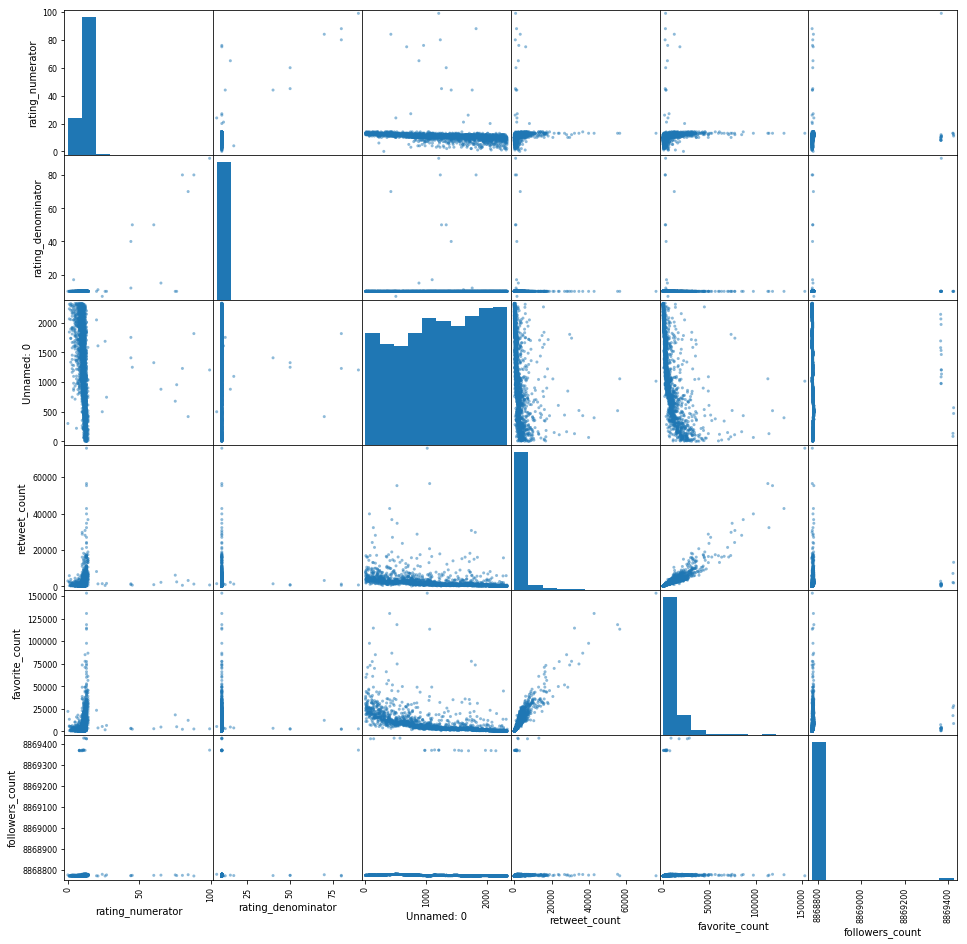

In [80]:
pd.plotting.scatter_matrix(archive.iloc[:, 1:], figsize=(16, 16));

##  4.1. Retweet Counts <a class="anchor" id="RetweetCounts"></a>

In [81]:
archive['retweet_count'].describe()

count     1964.000000
mean      2414.272403
std       4313.107398
min         11.000000
25%        538.000000
50%       1168.500000
75%       2759.750000
max      75880.000000
Name: retweet_count, dtype: float64

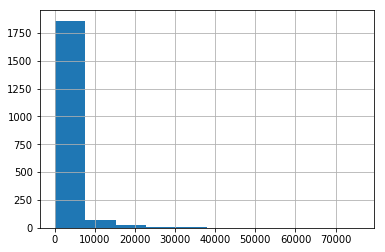

In [82]:
archive['retweet_count'].hist();

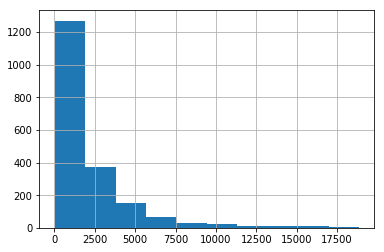

In [83]:
archive[archive['retweet_count'] <= 20000]['retweet_count'].hist();

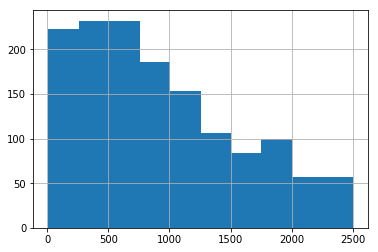

In [84]:
archive[archive['retweet_count'] <= 2500]['retweet_count'].hist();

##  4.2. Favorites Count <a class="anchor" id="FavoritesCount"></a>

In [85]:
archive['favorite_count'].describe()

count      1964.000000
mean       8170.046843
std       12013.584736
min          70.000000
25%        1752.000000
50%        3685.500000
75%       10189.250000
max      153141.000000
Name: favorite_count, dtype: float64

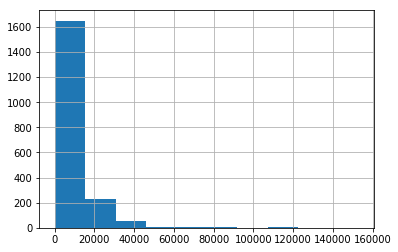

In [86]:
archive['favorite_count'].hist();

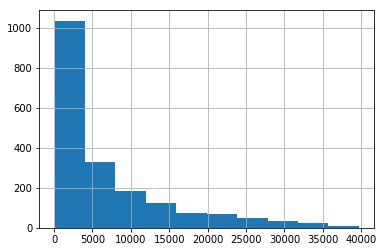

In [87]:
# Distribution Below 40000 Favorites
archive[archive['favorite_count'] <= 40000]['favorite_count'].hist();

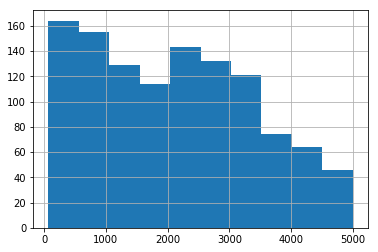

In [88]:
# Distribution Below 5000 Favorites
archive[archive['favorite_count'] <= 5000]['favorite_count'].hist();

##  4.3. Most Popular Names <a class="anchor" id="MostPopNames"></a>

In [166]:
archive['name'].value_counts().head(10)

Charlie    13
Oliver     11
Cooper     10
Tucker      9
Lucy        9
Daisy       8
Winston     8
Penny       8
Lola        7
Koda        6
Name: name, dtype: int64

##  4.4. What is the Most Common Rating? <a class="anchor" id="CommonRating"></a>

In [90]:
archive_15 = archive[(archive['rating_numerator'] <= 15) & (archive['rating_numerator'].apply(float.is_integer))]
subset_rating_counts = archive_15.groupby(['rating_numerator']).count()['tweet_id']

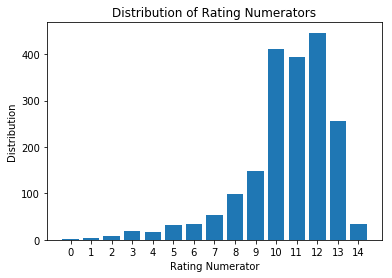

In [91]:
plt.bar(np.arange(15), subset_rating_counts)
plt.xticks(np.arange(15))
plt.xlabel('Rating Numerator')
plt.ylabel('Distribution')
plt.title('Distribution of Rating Numerators');

plt.savefig('MostCommonRates.png', bbox_inches='tight')

<blockquote> It seems like most common ratings are 12,10 and 11.</blockquote>

##  4.5. Interactions Over Time <a class="anchor" id="IntOverTime"></a>

###  4.5.1. Retweets <a class="anchor" id="Retweets"></a>

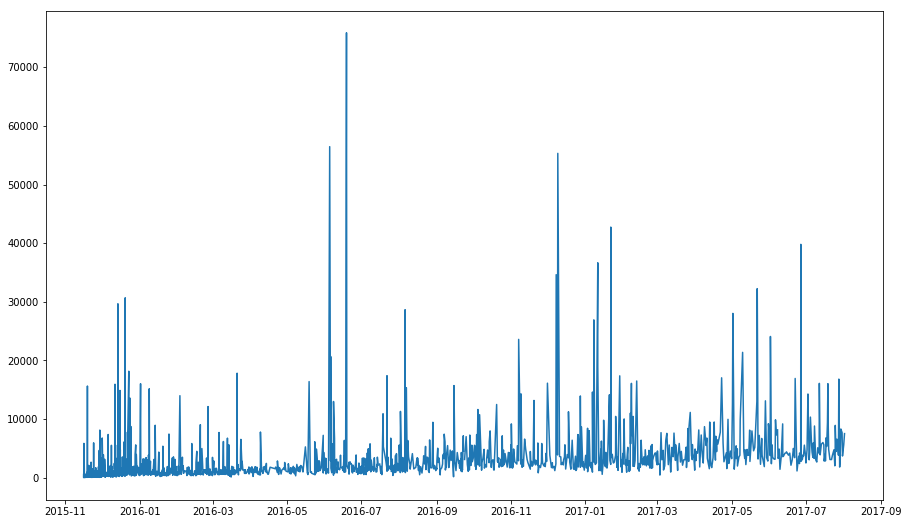

In [92]:
sns.set_context()
plt.subplots(figsize=(15, 9))
plt.plot(archive['timestamp'], archive['retweet_count']);

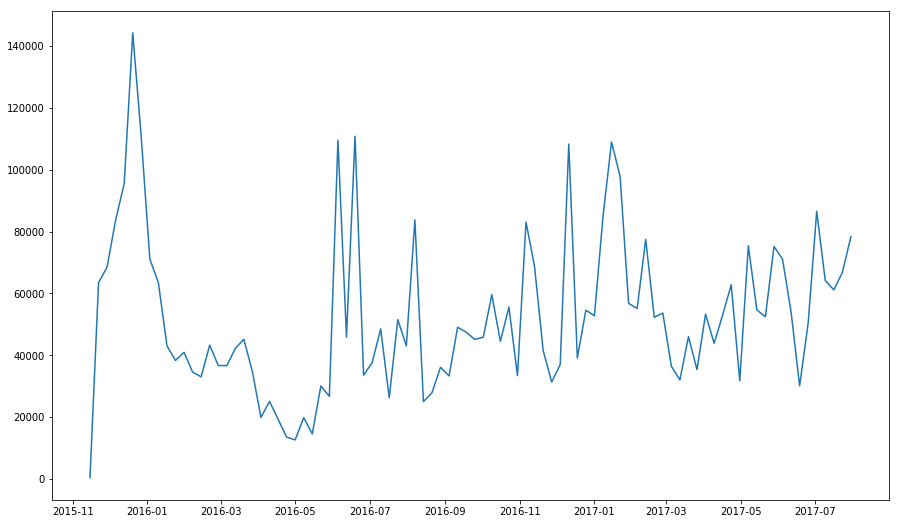

In [93]:
weekly_retweet = archive.groupby(pd.Grouper(key='timestamp', freq='1w'))['retweet_count'].sum()\
                    .reset_index().sort_values('timestamp')[:-1]
plt.subplots(figsize=(15, 9))
plt.plot(weekly_retweet['timestamp'], weekly_retweet['retweet_count']);

###  4.5.2. Favorites <a class="anchor" id="Favorites"></a>

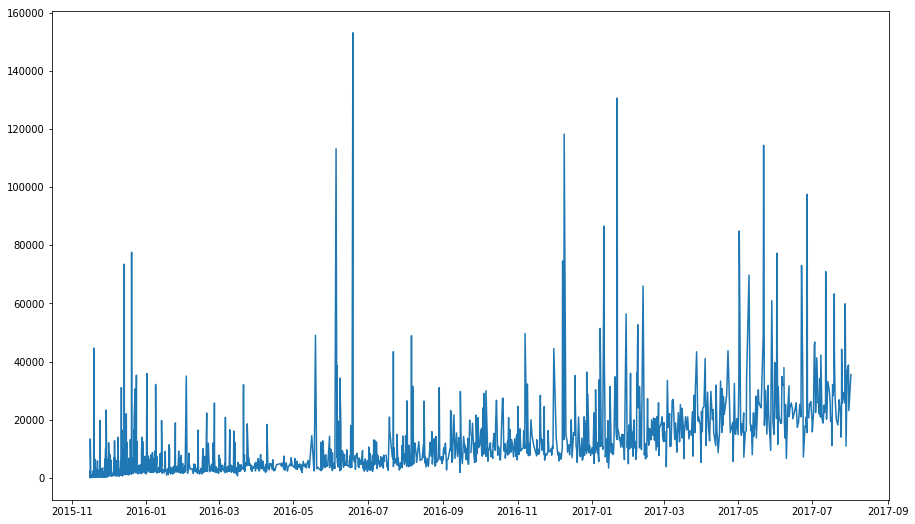

In [94]:
plt.subplots(figsize=(15, 9))
plt.plot(archive['timestamp'], archive['favorite_count']);

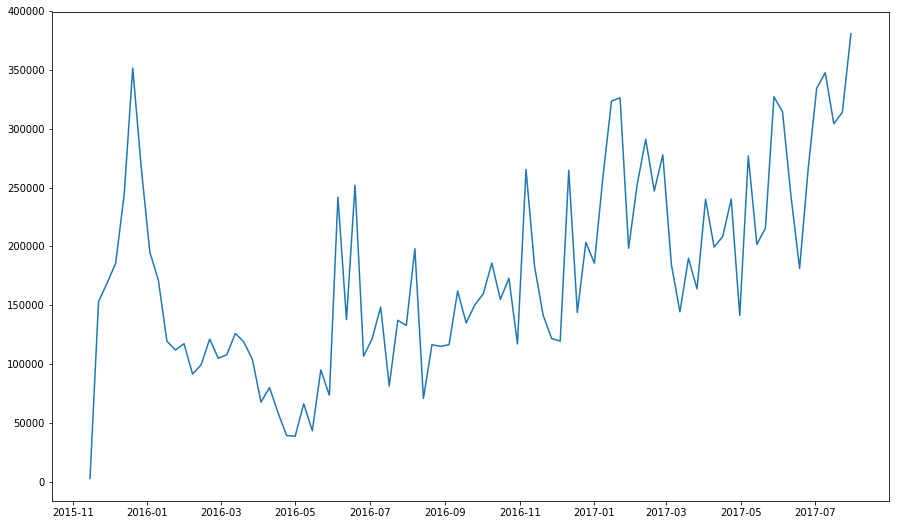

In [95]:
weekly_favorite = archive.groupby(pd.Grouper(key='timestamp', freq='1w'))['favorite_count'].sum()\
                    .reset_index().sort_values('timestamp')[:-1]
plt.subplots(figsize=(15, 9))
plt.plot(weekly_favorite['timestamp'], weekly_favorite['favorite_count']);

###  4.5.3. Followers <a class="anchor" id="Followers"></a>

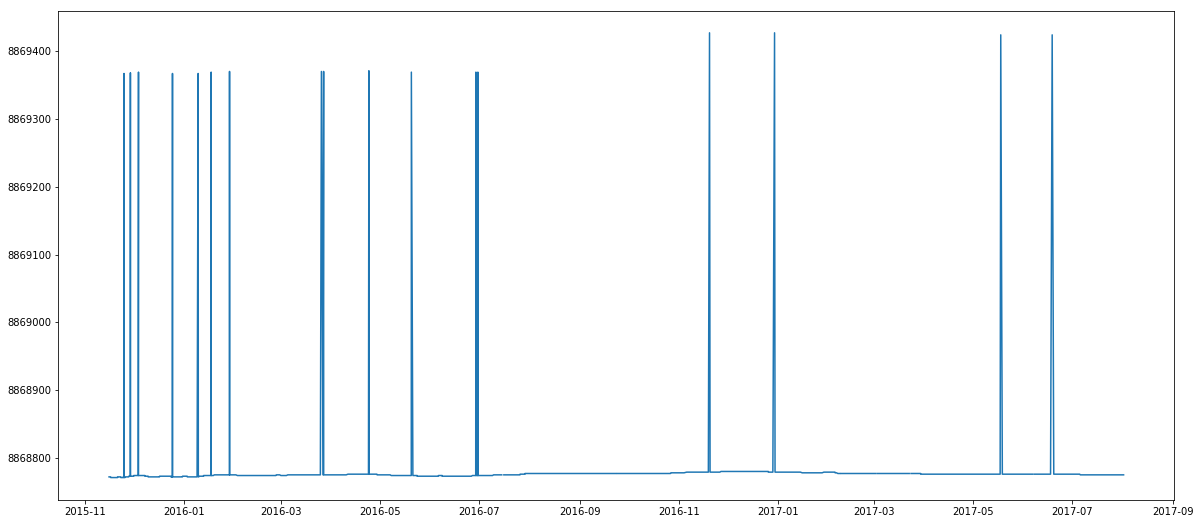

In [96]:
plt.subplots(figsize=(20, 9))
plt.plot(archive['timestamp'], archive['followers_count']);

In [97]:
archive.followers_count.describe()

count    1.964000e+03
mean     8.868780e+06
std      5.638447e+01
min      8.868771e+06
25%      8.868773e+06
50%      8.868774e+06
75%      8.868776e+06
max      8.869427e+06
Name: followers_count, dtype: float64

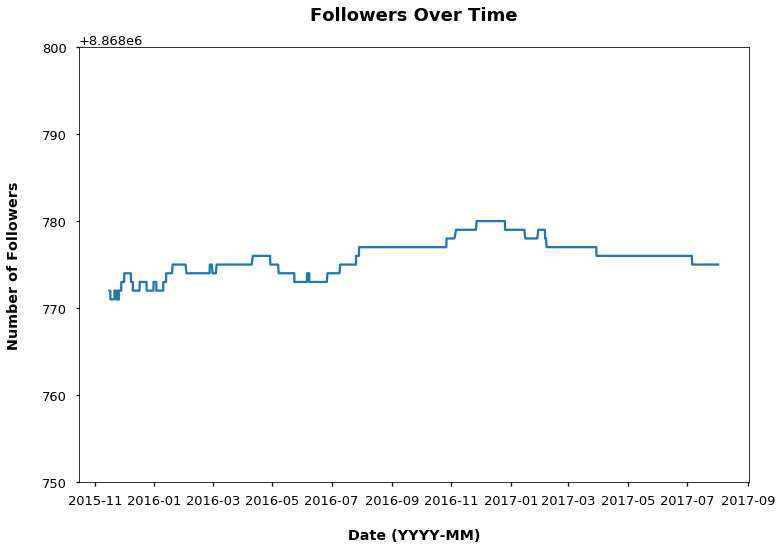

In [98]:
follower_count = archive.query('followers_count < 8868850')

sns.set_context("talk")
plt.subplots(figsize=(12, 8))
plt.plot(follower_count['timestamp'], follower_count['followers_count'])
plt.ylim(8868750, 8868800)
plt.title('Followers Over Time\n', fontsize=18, weight='bold')
plt.xlabel('\nDate (YYYY-MM)', weight='bold')
plt.ylabel('Number of Followers\n', weight='bold');
plt.savefig('Followers-Over-Time.png')

##  4.6. Popular Dog Types <a class="anchor" id="PopDogTypes"></a>

###  4.6.1. Overall Popular <a class="anchor" id="OverallPop"></a>

In [105]:
dog_counts = archive.groupby('dog_type')['tweet_id'].count().sort_values(ascending=False)
dog_counts

dog_type
pupper     225
doggo       66
puppo       28
floofer      3
Name: tweet_id, dtype: int64

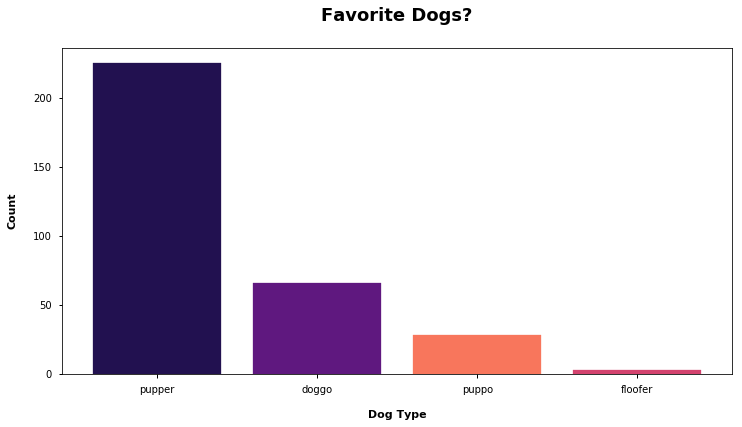

In [148]:
sns.set_context("notebook")
palette = sns.color_palette('magma')
plt.subplots(figsize=(12, 6))
barlist = plt.bar([1, 2, 3, 4], dog_counts, tick_label=['pupper', 'doggo', 'puppo', 'floofer'])
plt.title('Favorite Dogs?\n', fontsize=18, weight='bold')
plt.xlabel('\nDog Type', weight='bold')
plt.ylabel('Count\n', weight='bold');
barlist[0].set_color(palette[0])
barlist[1].set_color(palette[1])
barlist[2].set_color(palette[-2])
barlist[3].set_color(palette[3])
plt.savefig('popular_dogs.png')

###  4.6.2. Dog Types vs Retweet & Favorites <a class="anchor" id="DogTypeRTFav"></a>

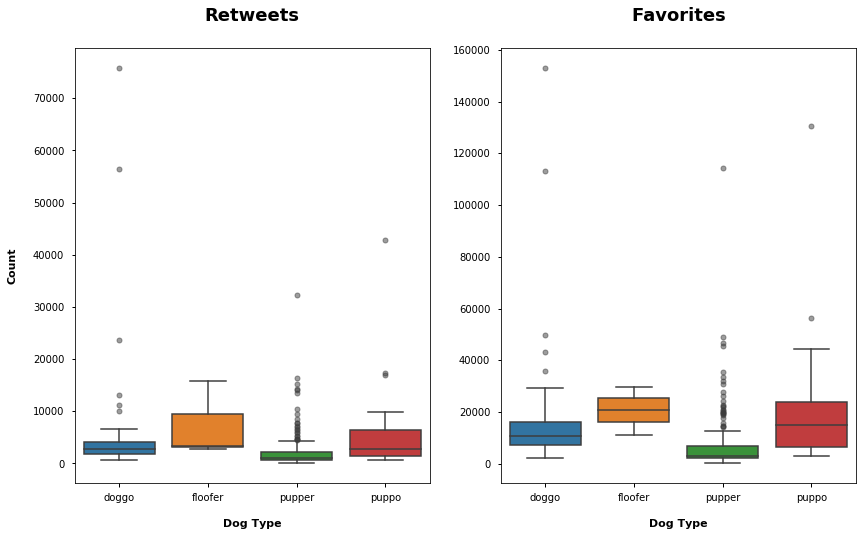

In [149]:
# Set outlier style
flierprops = dict(marker='o', alpha=0.5, markeredgewidth=1)

plt.subplots(figsize=(14, 8))
plt.subplot(121)
sns.boxplot(x=archive['dog_type'], y=archive['retweet_count'], flierprops=flierprops, linewidth=1.5)
plt.title('Retweets\n', fontsize=18, weight='bold')
plt.xlabel('\nDog Type', weight='bold')
plt.ylabel('Count\n', weight='bold');

plt.subplot(122)
sns.boxplot(x=archive['dog_type'], y=archive['favorite_count'], flierprops=flierprops, linewidth=1.5)
plt.title('Favorites\n', fontsize=18, weight='bold')
plt.xlabel('\nDog Type', weight='bold')
plt.ylabel('');
plt.savefig('boxplot.png')

## 4.7. Highest Rated Dogs of All Time <a class="anchor" id="HighestRatedDogs"></a>

###  4.7.1. Top 5 Retweet Dogs <a class="anchor" id="Top5RT"></a>

In [150]:
ind = archive['retweet_count'].nlargest(5).index
high_retweet = archive[['tweet_id', 'text', 'name', 'retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator', 'dog_type']].iloc[ind]
high_retweet

,tweet_id,text,name,retweet_count,favorite_count,rating_numerator,rating_denominator,dog_type
769,744234799360020481,Here's a doggo realizing you can stand in a po...,NaN,75880.0,153141.0,13.0,10.0,doggo
804,739238157791694849,Here's a doggo blowing bubbles. It's downright...,NaN,56458.0,113226.0,13.0,10.0,doggo
397,807106840509214720,This is Stephan. He just wants to help. 13/10 ...,Stephan,55313.0,118255.0,13.0,10.0,NaN
306,822872901745569793,Here's a super supportive puppo participating ...,NaN,42737.0,130650.0,13.0,10.0,puppo
58,879415818425184262,This is Duddles. He did an attempt. 13/10 some...,Duddles,39791.0,97564.0,13.0,10.0,NaN


In [151]:
high_retweet.describe()

,retweet_count,favorite_count,rating_numerator,rating_denominator
count,5.000000,5.000000,5.0,5.0
mean,54035.800000,122567.200000,13.0,10.0
std,14276.244033,20803.256949,0.0,0.0
min,39791.000000,97564.000000,13.0,10.0
25%,42737.000000,113226.000000,13.0,10.0
50%,55313.000000,118255.000000,13.0,10.0
75%,56458.000000,130650.000000,13.0,10.0
max,75880.000000,153141.000000,13.0,10.0


**Let's see the dogs!**

In [172]:
image = predictions[predictions['tweet_id'] == '744234799360020481']['jpg_url']
dups = image.duplicated()
image = image[~dups]
image.values[0]


url_list = []
for tweet_id in high_retweet['tweet_id']:
    image = predictions[predictions['tweet_id'] == tweet_id]['jpg_url']
    dups = image.duplicated()
    image = image[~dups]
    image_url = image.values[0]
    url_list.append(image_url)
    
url_list

['https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg',
 'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg']

### Most Rewteeted Dog Number 1!

In [214]:
print(high_retweet['text'].loc[ind[0]])
Image(url= url_list[0], width=150, height=150)

Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad)


### Most Rewteeted Dog Number 2!

In [213]:
print(high_retweet['text'].loc[ind[1]])
Image(url= url_list[1], width=150, height=150)


Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee)


### Most Rewteeted Dog Number 3!

In [215]:
print(high_retweet['text'].loc[ind[2]])
Image(url= url_list[2], width=150, height=150)

This is Stephan. He just wants to help. 13/10 such a good boy


### Most Rewteeted Dog Number 4!

In [216]:
print(high_retweet['text'].loc[ind[3]])
Image(url= url_list[3], width=150, height=150)

Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10


### Most Rewteeted Dog Number 5!

In [217]:
print(high_retweet['text'].loc[ind[4]])
Image(url= url_list[4], width=150, height=150)

This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici)


###  4.7.2. Top 5 Favorited Dogs <a class="anchor" id="Top5Fav"></a>


In [152]:
# Get index
fav_ind = archive['favorite_count'].nlargest(5).index
# Get details
high_favorite = archive[['tweet_id', 'text', 'name', 'retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator', 'dog_type']].iloc[fav_ind]
high_favorite

,tweet_id,text,name,retweet_count,favorite_count,rating_numerator,rating_denominator,dog_type
769,744234799360020481,Here's a doggo realizing you can stand in a po...,NaN,75880.0,153141.0,13.0,10.0,doggo
306,822872901745569793,Here's a super supportive puppo participating ...,NaN,42737.0,130650.0,13.0,10.0,puppo
397,807106840509214720,This is Stephan. He just wants to help. 13/10 ...,Stephan,55313.0,118255.0,13.0,10.0,NaN
108,866450705531457537,This is Jamesy. He gives a kiss to every other...,Jamesy,32239.0,114414.0,13.0,10.0,pupper
804,739238157791694849,Here's a doggo blowing bubbles. It's downright...,NaN,56458.0,113226.0,13.0,10.0,doggo


Let's see if there are also in the most retweeted tweet

In [153]:
high_favorite['tweet_id'].isin(high_retweet['tweet_id'])

769     True
306     True
397     True
108    False
804     True
Name: tweet_id, dtype: bool

Only the fourth dog is different than most retweeted list

In [209]:
fav_image = predictions[predictions['tweet_id'] == high_favorite['tweet_id'].loc[108]]['jpg_url']
fav_dups = fav_image.duplicated()
fav_image = fav_image[~fav_dups]
fav_image_url = fav_image.values[0]

In [218]:
print(high_favorite.text.loc[108])
print('')
Image(url= fav_image_url, width=300, height=300)

This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender



##  4.8. Is There a Correlation Between Retweets and Favorites? <a class="anchor" id="Correlation"></a>

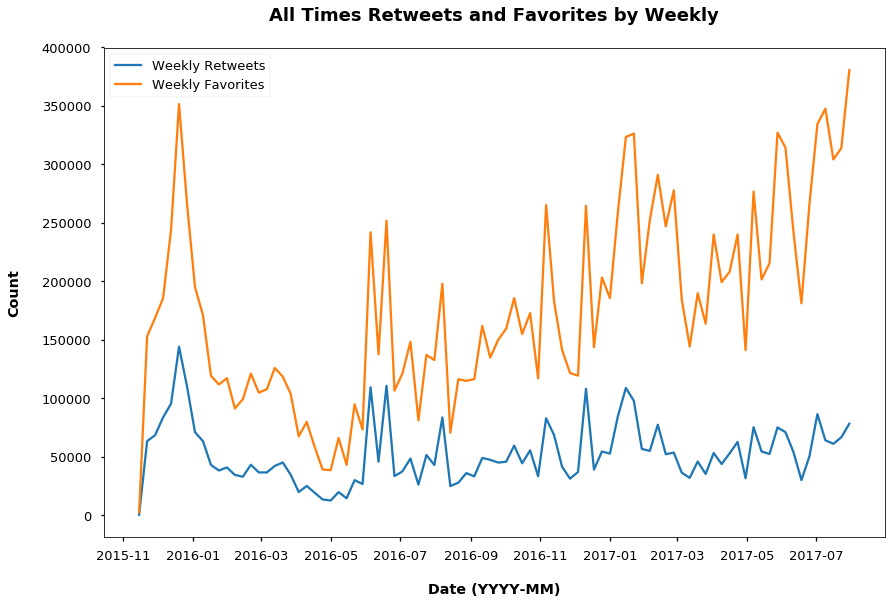

In [154]:
sns.set_context("talk")
plt.subplots(figsize=(14, 9))
plt.plot(weekly_retweet['timestamp'], weekly_retweet['retweet_count'], label="Weekly Retweets")
plt.plot(weekly_favorite['timestamp'], weekly_favorite['favorite_count'], label="Weekly Favorites")
plt.title('All Times Retweets and Favorites by Weekly\n', fontsize=18, weight='bold')
plt.xlabel('\nDate (YYYY-MM)', weight='bold')
plt.ylabel('Count\n', weight='bold')
plt.legend();
plt.savefig('AllTime-Retweets-and-Favorites.png')

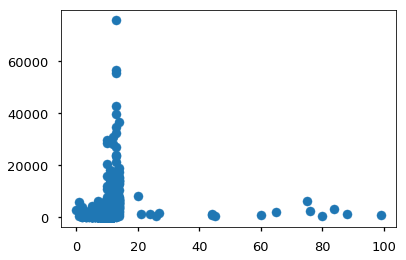

In [155]:
sns.set_context()
plt.scatter(archive['rating_numerator'], archive['retweet_count']);

In [156]:
ratings_df = archive.query('rating_numerator <= 20').copy()

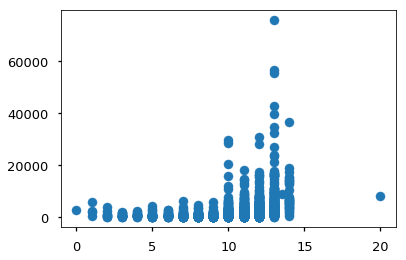

In [157]:
sns.set_context()
plt.scatter(ratings_df['rating_numerator'], ratings_df['retweet_count']);

This graph needs improvement, let's normalize the data by applying __*log transformation*__

In [158]:
ratings_df['retweet_count'] = ratings_df['retweet_count'].transform(lambda x: np.log10(x))
ratings_df['favorite_count'] = ratings_df['favorite_count'].transform(lambda x: np.log10(x))

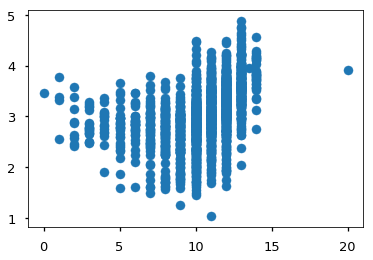

In [159]:
sns.set_context()
plt.scatter(ratings_df['rating_numerator'], ratings_df['retweet_count']);

Much better, but we need to use more detailed graphs to grapsh the data.
- [Seaborn Color Palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)
- [Plotting With Categorical Data](https://seaborn.pydata.org/tutorial/categorical.html)
- [How to set seed for Jitter in Seaborn Stripplot](https://stackoverflow.com/questions/61944815/how-to-set-seed-for-jitter-in-seaborn-stripplot)

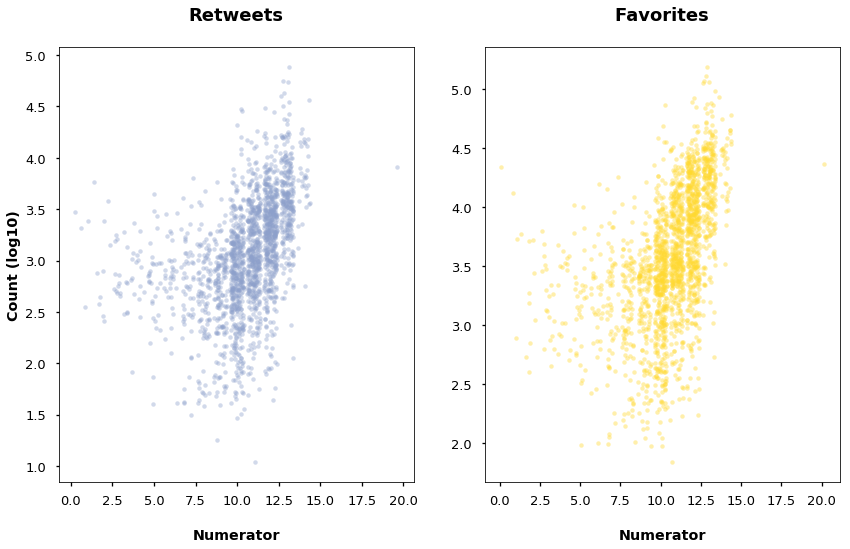

In [165]:
my_palette = sns.color_palette("Set2")
plt.subplots(figsize=(14, 8))

plt.subplot(121)
sns.regplot(x='rating_numerator', 
            y='retweet_count', 
            data=ratings_df, 
            fit_reg=False, 
            x_jitter=0.4,
            scatter_kws={'alpha': 0.4, 's': 20},
            color=my_palette[2]
           )
plt.title('Retweets\n', fontsize=18, weight='bold')
plt.xlabel('\nNumerator', weight='bold')
plt.ylabel('Count (log10)', weight='bold');

plt.subplot(122)
sns.regplot(x='rating_numerator', 
            y='favorite_count', 
            data=ratings_df, 
            fit_reg=False, 
            x_jitter=0.4, 
            scatter_kws={'alpha': 0.4, 's': 20},
            color=my_palette[-1]
           )
plt.title('Favorites\n', fontsize=18, weight='bold')
plt.xlabel('\nNumerator', weight='bold')
plt.ylabel('', weight='bold');
plt.savefig('Retweets-Favorites-Numerator.png')

##  4.9. How Good Twitter Prediction Algorithm is? <a class="anchor" id="HowGoodTwitter"></a>

How confident is predictions?

In [248]:
confidence = predictions.groupby('prediction_order')['confidence']

In [251]:
confidence.describe()

,count,mean,std,min,25%,50%,75%,max
prediction_order,,,,,,,,
1,1971.0,0.594558,0.272126,4.433340e-02,0.363091,0.587764,0.847827,1.000000
2,1971.0,0.134585,0.101053,1.011300e-08,0.053398,0.117397,0.195566,0.488014
3,1971.0,0.060166,0.050942,1.740170e-10,0.016081,0.049444,0.091538,0.273419


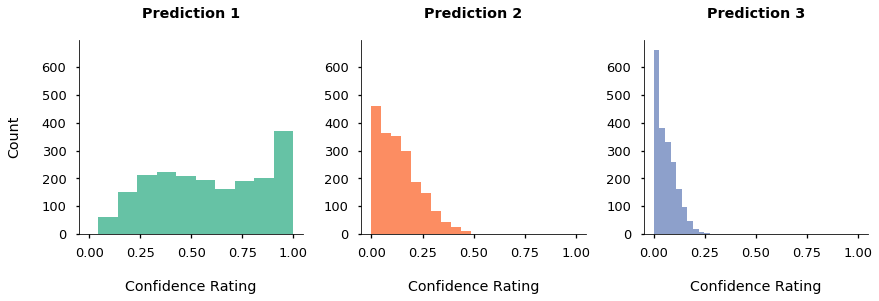

In [265]:
sns.FacetGrid(predictions, 
              col="prediction_order", 
              hue="prediction_order", 
              palette= my_palette[0:], 
              size=4)\
    .map(plt.hist, "confidence")\
    .set_titles("Prediction {col_name}\n", 
                weight='bold', 
                fontsize=14)\
    .set_axis_labels("\nConfidence Rating", 
                     "Count\n");
plt.savefig('Confidence.png')

In [253]:
sample_dogs = predictions.query('prediction_order == 1').sample(5)
sample_dogs

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
294,667782464991965184,https://pbs.twimg.com/media/CURwm3cUkAARcO6.jpg,1,1,lorikeet,0.466149,False
1557,676811746707918848,https://pbs.twimg.com/media/CWSEsO9WwAAX-fZ.jpg,1,1,Chihuahua,0.440916,True
2805,705066031337840642,https://pbs.twimg.com/media/CcjlzRkW0AMqmWg.jpg,1,1,Airedale,0.868658,True
2550,697463031882764288,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1,1,Labrador_retriever,0.999885,True
4290,779056095788752897,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,1,Chihuahua,0.721188,True


### First Sample

In [255]:
Image(url=sample_dogs.jpg_url.iloc[0], width=300, height=300)

<blockquote> Yeap, it's definetly not a dog. But hey, look at this cutie! </blockquote>

### Second Sample 

In [256]:
Image(url=sample_dogs.jpg_url.iloc[1], width=300, height=300)

<blockquote> They don't bite. I swear.</blockquote>

### Third Sample 

In [257]:
Image(url=sample_dogs.jpg_url.iloc[2], width=300, height=300)

<blockquote> Just your standard Airedale, swinging...</blockquote>

### Forth Sample 

In [258]:
Image(url=sample_dogs.jpg_url.iloc[3], width=300, height=300)

<blockquote> If you're having a bad day, here is your bucket of retriever puppies! </blockquote>

### Fifth Sample 

In [259]:
Image(url=sample_dogs.jpg_url.iloc[4], width=300, height=300)

<blockquote> Don't you dare look at my ears boy! </blockquote>